# Tweets Sentiment Analysis Using Machine Learning Algorithm
---
For this project, I use a Kaggle DataSet and perform complete steps to prepare the Model. I also tested the data by adding some new tweets. 

## Index of Steps we are going to follow
---
1. import libraries
2. upload dataset CSV file
3. Preprocess the data for the Model
4. Split Testing & Training set of data
5. Convert text data into numeric form using TD-IDF vectorization
6. Handle Imbalance using SMOTE
7. Save vector & Scalor using .pkl 
8. Split the train & test data 
9. Train Models & save using .pkl 
10. Evaluate the Model
11. Classification & Accuracy report with F1-score
12. Precision-recall curve Graph
13. Some Graph to check the Model Accuracy
14. Prediction of new tweets

## Import Libraries
* Some important libraries for data upload, preprocess, Split training and testing, Algorithm implementation, plotting Evalation

In [52]:
# Required Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
import joblib  # For saving models and artifacts

## Loading the Data Show the Structure of Data 
---
* Data is in CSV file formate.
* load the data And see the head of DataSet.  

In [2]:
# Load the Data
data = pd.read_csv('Tweets.csv')

# Display initial data structure
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
# Info of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


## Data Preprocessing & Cleaning
---
* Find missing values Handle them.
* Clean the special character from the **text column** and prepare it for the model.
* Encode or Lable the **sentiment column** values:
 1. Negative = **0**
 2. Neutral = **1**
 3. Positive = **2**

In [4]:
# Find null values
print("\nNull values per column:\n", data.isnull().sum())


Null values per column:
 textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


In [5]:
# Handle missing values
data.dropna(inplace=True)
# Verify
print("\nNull values per column:\n", data.isnull().sum())


Null values per column:
 textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


In [6]:
# Function for clean the unwanted characters e.t.c 
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()

# Clean the 'text' column
data['text'] = data['text'].apply(clean_text)

# Display clean Data
print("Clean Data:")
data.head()

Clean Data:


,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego,Sooo SAD,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the relea...,"Sons of ****,",negative


In [7]:
# Encode Sentiment Labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
data['sentiment'] = data['sentiment'].map(label_mapping)

# Check label distribution
print("\nSentiment distribution:\n", data['sentiment'].value_counts())


Sentiment distribution:
 sentiment
1    11117
2     8582
0     7781
Name: count, dtype: int64


## Split data for Training and Testing Set
---
* X set independent column **test**
* y set dependent column **sentiment**
* Then transform text data to numeric using TD-IDF
* Scale the TD-IDF features
* save vector & scalar .pkl
* visualize TD-IDF Features
* Train_Test Split 80% train, 20% test by using Random_state

In [8]:
# Split Data into Training and Testing Sets

X = data['text']
y = data['sentiment']

In [35]:
# Transform text data into numerical form using TF-IDF

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

In [36]:
# Scale the TF-IDF features

scaler = StandardScaler(with_mean=False)  # with_mean=False is required for sparse matrices
X_tfidf_scaled = scaler.fit_transform(X_tfidf)

In [37]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [38]:
# Handle Imbalanced Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
# Scale Features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Save vectorizer and scaler
try:
    joblib.dump(vectorizer, 'vectorizer.pkl')
    print("Vectorizer saved successfully as 'vectorizer.pkl'.")
except Exception as e:
    print(f"Error saving vectorizer: {e}")

try:
    joblib.dump(scaler, 'scaler.pkl')
    print("Scaler saved successfully as 'scaler.pkl'.")
except Exception as e:
    print(f"Error saving scaler: {e}")

Vectorizer saved successfully as 'vectorizer.pkl'.
Scaler saved successfully as 'scaler.pkl'.


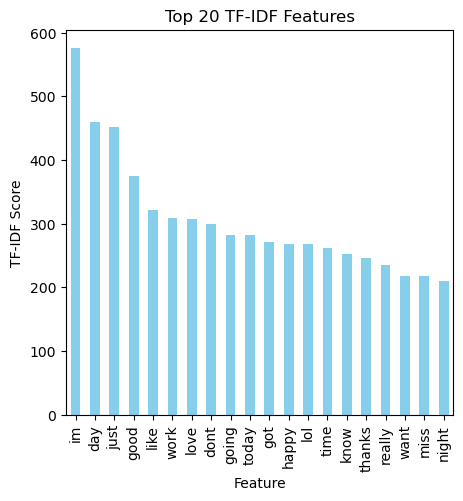

In [41]:
# Visualize TF-IDF Features
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)
top_tfidf = tfidf_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(5, 5))
top_tfidf.plot(kind='bar', color='skyblue')
plt.title("Top 20 TF-IDF Features")
plt.xlabel("Feature")
plt.ylabel("TF-IDF Score")
plt.savefig('top_tfidf_features.png')
plt.show()

# Train Model & Save
---

## Train Logistic Regression Model

In [42]:
# Train Logistic Regression Model with Hyperparameter Tuning
param_grid_lr = {'C': [0.0001, 0.001, 0.1, 1, 2]}
logistic_model = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42), param_grid_lr, cv=5)
logistic_model.fit(X_train, y_train)
print("\nBest parameters for Logistic Regression:", logistic_model.best_params_)



Best parameters for Logistic Regression: {'C': 1}


In [43]:
# Save the trained model
joblib.dump(logistic_model, 'logistic_model.pkl')

['logistic_model.pkl']

## Evaluate the Model
---

In [44]:
# Evaluate the Model
y_pred = logistic_model.predict(X_test)

print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.57      0.63      1572
     Neutral       0.62      0.75      0.68      2236
    Positive       0.77      0.71      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.70      0.68      0.68      5496
weighted avg       0.70      0.69      0.69      5496



In [53]:
# Save classification report an Accuracy
with open('classification_report.txt', 'w') as f:
    f.write(report)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nAccuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.69
F1-Score: 0.69


## Accuracy & F1-Score Visualization

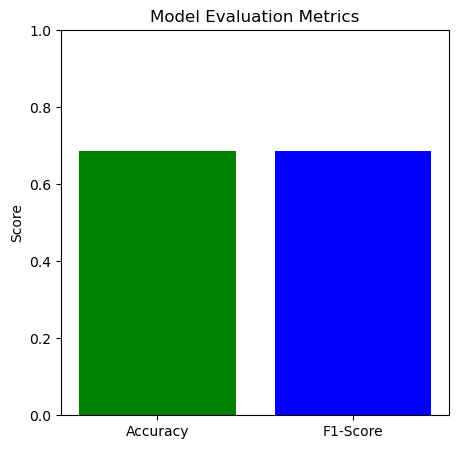

In [55]:
# Accuracy and F1-Score Visualization
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy', 'F1-Score'], [accuracy, f1], color=['green', 'blue'])
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.savefig('evaluation_metrics_graph.png')
plt.show()


## Precision-Recall Curve

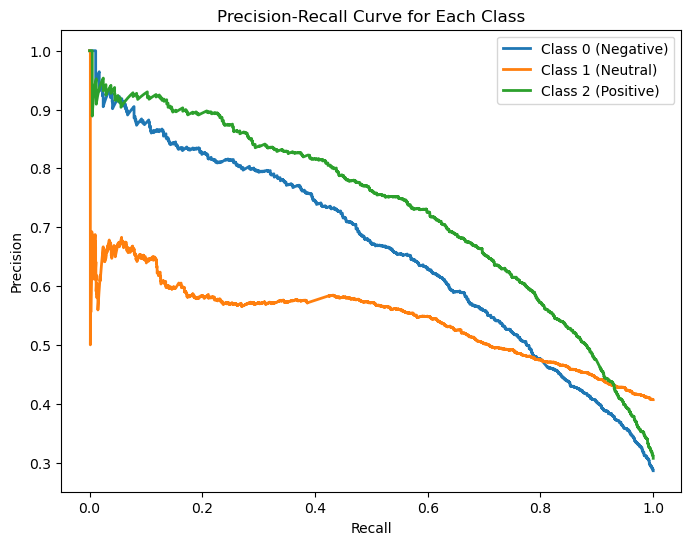

In [56]:
# Precision-Recall Curve
# Binarize the output for multi-class precision-recall calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Get decision function scores
y_scores = logistic_model.decision_function(X_test_scaled)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i} ({"Negative" if i == 0 else "Neutral" if i == 1 else "Positive"})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="best")
plt.savefig('precision_recall_curve_multiclass.png')
plt.show()



## Predict Sentiment for New Tweets

In [66]:
# Predict Sentiment for New Tweets
new_tweets = [
    "I absolutely love this product!",
    "This is the worst experience ever.",
    "I'm not sure if this is worth it, still thinking about it. it is good for me or bad",
    "Not sure how I feel about this.",
    "The service was good but could be better.",
    "This movie has an average storyline, not too good, not too bad.",
    "The new update is fantastic! I'm really enjoying the improvements.",
    "Terrible customer service, I am so disappointed!",
    "The event starts at 10 AM tomorrow. Check your schedule.",
    "Just an ordinary day, nothing special to share nothing good or bad."
]

# Clean and transform new tweets
cleaned_tweets = [clean_text(tweet) for tweet in new_tweets]
new_tweets_tfidf = vectorizer.transform(cleaned_tweets)
new_tweets_tfidf_scaled = scaler.transform(new_tweets_tfidf)

In [67]:
# Predict sentiment
predictions = logistic_model.predict(new_tweets_tfidf_scaled)

results = pd.DataFrame({
    'Tweet': new_tweets,
    'Predicted Sentiment': predictions
})

# Map numeric labels back to sentiment
results['Predicted Sentiment'] = results['Predicted Sentiment'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

print("\nPredictions for New Tweets:")
print(results)



Predictions for New Tweets:
                                               Tweet Predicted Sentiment
0                    I absolutely love this product!            Positive
1                 This is the worst experience ever.            Negative
2  I'm not sure if this is worth it, still thinki...             Neutral
3                    Not sure how I feel about this.            Negative
4          The service was good but could be better.            Positive
5  This movie has an average storyline, not too g...             Neutral
6  The new update is fantastic! I'm really enjoyi...            Positive
7   Terrible customer service, I am so disappointed!            Negative
8  The event starts at 10 AM tomorrow. Check your...            Positive
9  Just an ordinary day, nothing special to share...             Neutral


In [68]:
# Save predictions
results.to_csv('new_tweet_predictions.csv', index=False)